In [7]:
import yaml
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from scripts import *

plt.rcParams['font.size'] = 16

In [8]:
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'

In [9]:
modeldir = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/'
uv_spec = np.loadtxt(os.path.join(modeldir, 'uv_enhanced/starspec.txt'))
spec = np.loadtxt(os.path.join(modeldir, 'baseline/starspec.txt'))

Text(0, 0.5, 'flux')

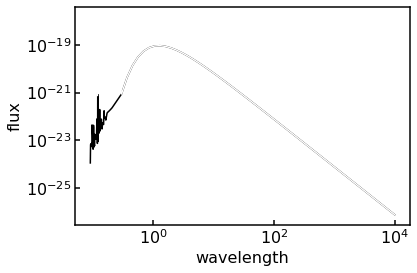

In [10]:
plt.plot(spec[0], spec[1], 'k')
plt.plot(uv_spec[0], uv_spec[1], 'w')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('wavelength');plt.ylabel('flux')

In [ ]:
norm = setup(PATH=path, models=['rsnow5_inner'], uv=False, run=True,
             disk_params={'r_out':6.0, 'r_peb':6.0, 'r_snow':5.0})

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:46: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'T_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_uv_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'R_star' in star_keys:
/Users/ar

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/rsnow1_inner/model_inputs.yaml
rsnow1_inner
saved star spectrum
Saved radmc setup files in /Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/rsnow1_inner
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
Saved gas disk data


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:41: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:42: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:45: MatplotlibDeprecationWarning: You are modifying the state of a globa

plotted rsnow1_inner summary figure


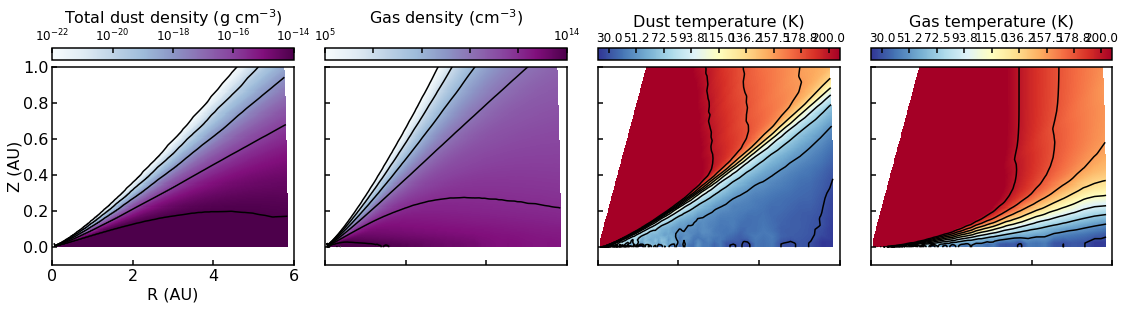

In [11]:
norm = setup(PATH=path, models=['rsnow1_inner'], uv=False, run=True,
             disk_params={'r_out':6.0, 'r_peb':6.0, 'r_snow':1})